# Wine Quality Prediction

In [1]:
# Importing required libraries
import pandas as pd
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
#wine_white_

In [2]:
# Load Dataset
train = pd.read_csv('D:/OSU_Courses/PhD_2021/Other/HackAI/train.csv')
test = pd.read_csv('D:/OSU_Courses/PhD_2021/Other/HackAI/test.csv')
train

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [14]:
test

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,3423,8.8,0.745,0.18,2.7,0.084,41.0,115.0,0.99823,3.38,0.70,9.8
1368,3424,15.6,0.240,0.55,2.9,0.062,11.0,25.0,0.99724,2.99,0.77,10.1
1369,3425,7.3,0.760,0.00,2.2,0.095,6.0,19.0,0.99880,3.67,0.60,9.4
1370,3426,7.6,0.780,0.26,2.6,0.118,17.0,104.0,0.99616,3.30,0.53,9.9


# Visualizing Correlations

<AxesSubplot: >

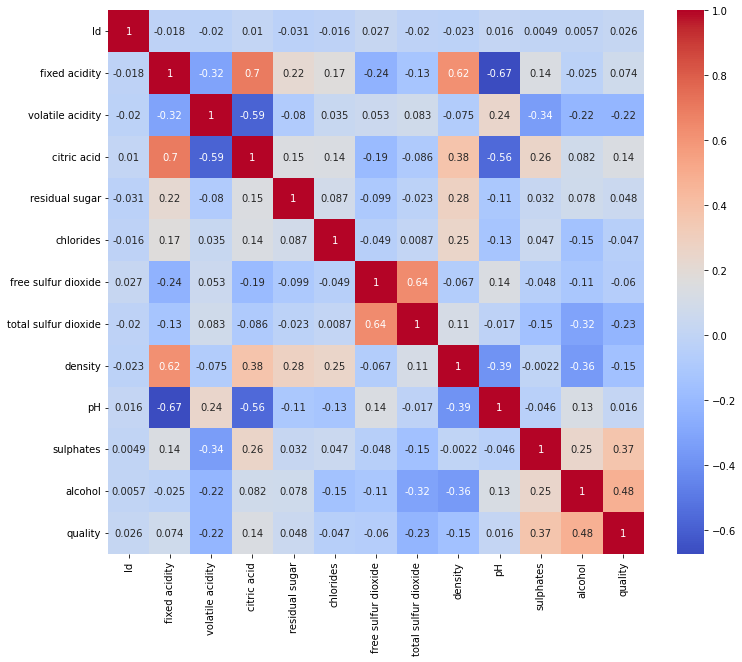

In [15]:
# Load the data
train = pd.read_csv("D:/OSU_Courses/PhD_2021/Other/HackAI/train.csv")

# Calculate the correlation matrix
corr_matrix = train.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

Based on the heatmap, here are some inferences we can make about the correlations between the features:

1. Quality has the strongest positive correlation with alcohol, and a moderate positive correlation with volatile acidity, sulphates, and citric acid. It has a moderate negative correlation with total acidity, and a weak negative correlation with density and fixed acidity. These correlations suggest that higher levels of alcohol, volatile acidity, sulphates, and citric acid are associated with higher quality wine, while higher levels of total acidity, density, and fixed acidity are associated with lower quality wine.

2. Alcohol has a strong positive correlation with density, and a moderate positive correlation with residual sugar, pH, and sulphates. It has a weak positive correlation with total sulfur dioxide, free sulfur dioxide, and citric acid. These correlations suggest that higher levels of alcohol are associated with higher density and residual sugar, while lower pH and higher sulphates may also contribute to higher alcohol levels.

3. Density has a strong positive correlation with residual sugar, and a moderate positive correlation with pH, fixed acidity, and total sulfur dioxide. It has a weak positive correlation with free sulfur dioxide and a weak negative correlation with citric acid. These correlations suggest that higher density is associated with higher levels of residual sugar, pH, fixed acidity, and total sulfur dioxide.

4. Residual sugar has a moderate positive correlation with pH and total sulfur dioxide, and a weak positive correlation with free sulfur dioxide and citric acid. These correlations suggest that higher levels of residual sugar may be associated with higher pH and total sulfur dioxide.

5. Total sulfur dioxide has a strong positive correlation with free sulfur dioxide, and a moderate positive correlation with pH and citric acid. These correlations suggest that higher levels of total sulfur dioxide are associated with higher levels of free sulfur dioxide, and that pH and citric acid may also contribute to higher levels of total sulfur dioxide.

6. Free sulfur dioxide has a weak positive correlation with citric acid and a weak negative correlation with pH. These correlations suggest that higher levels of free sulfur dioxide may be associated with higher levels of citric acid, and that lower pH may also contribute to higher levels of free sulfur dioxide.

7. pH has a weak negative correlation with fixed acidity, and a weak positive correlation with citric acid. These correlations suggest that lower pH may be associated with higher levels of fixed acidity and lower levels of citric acid.

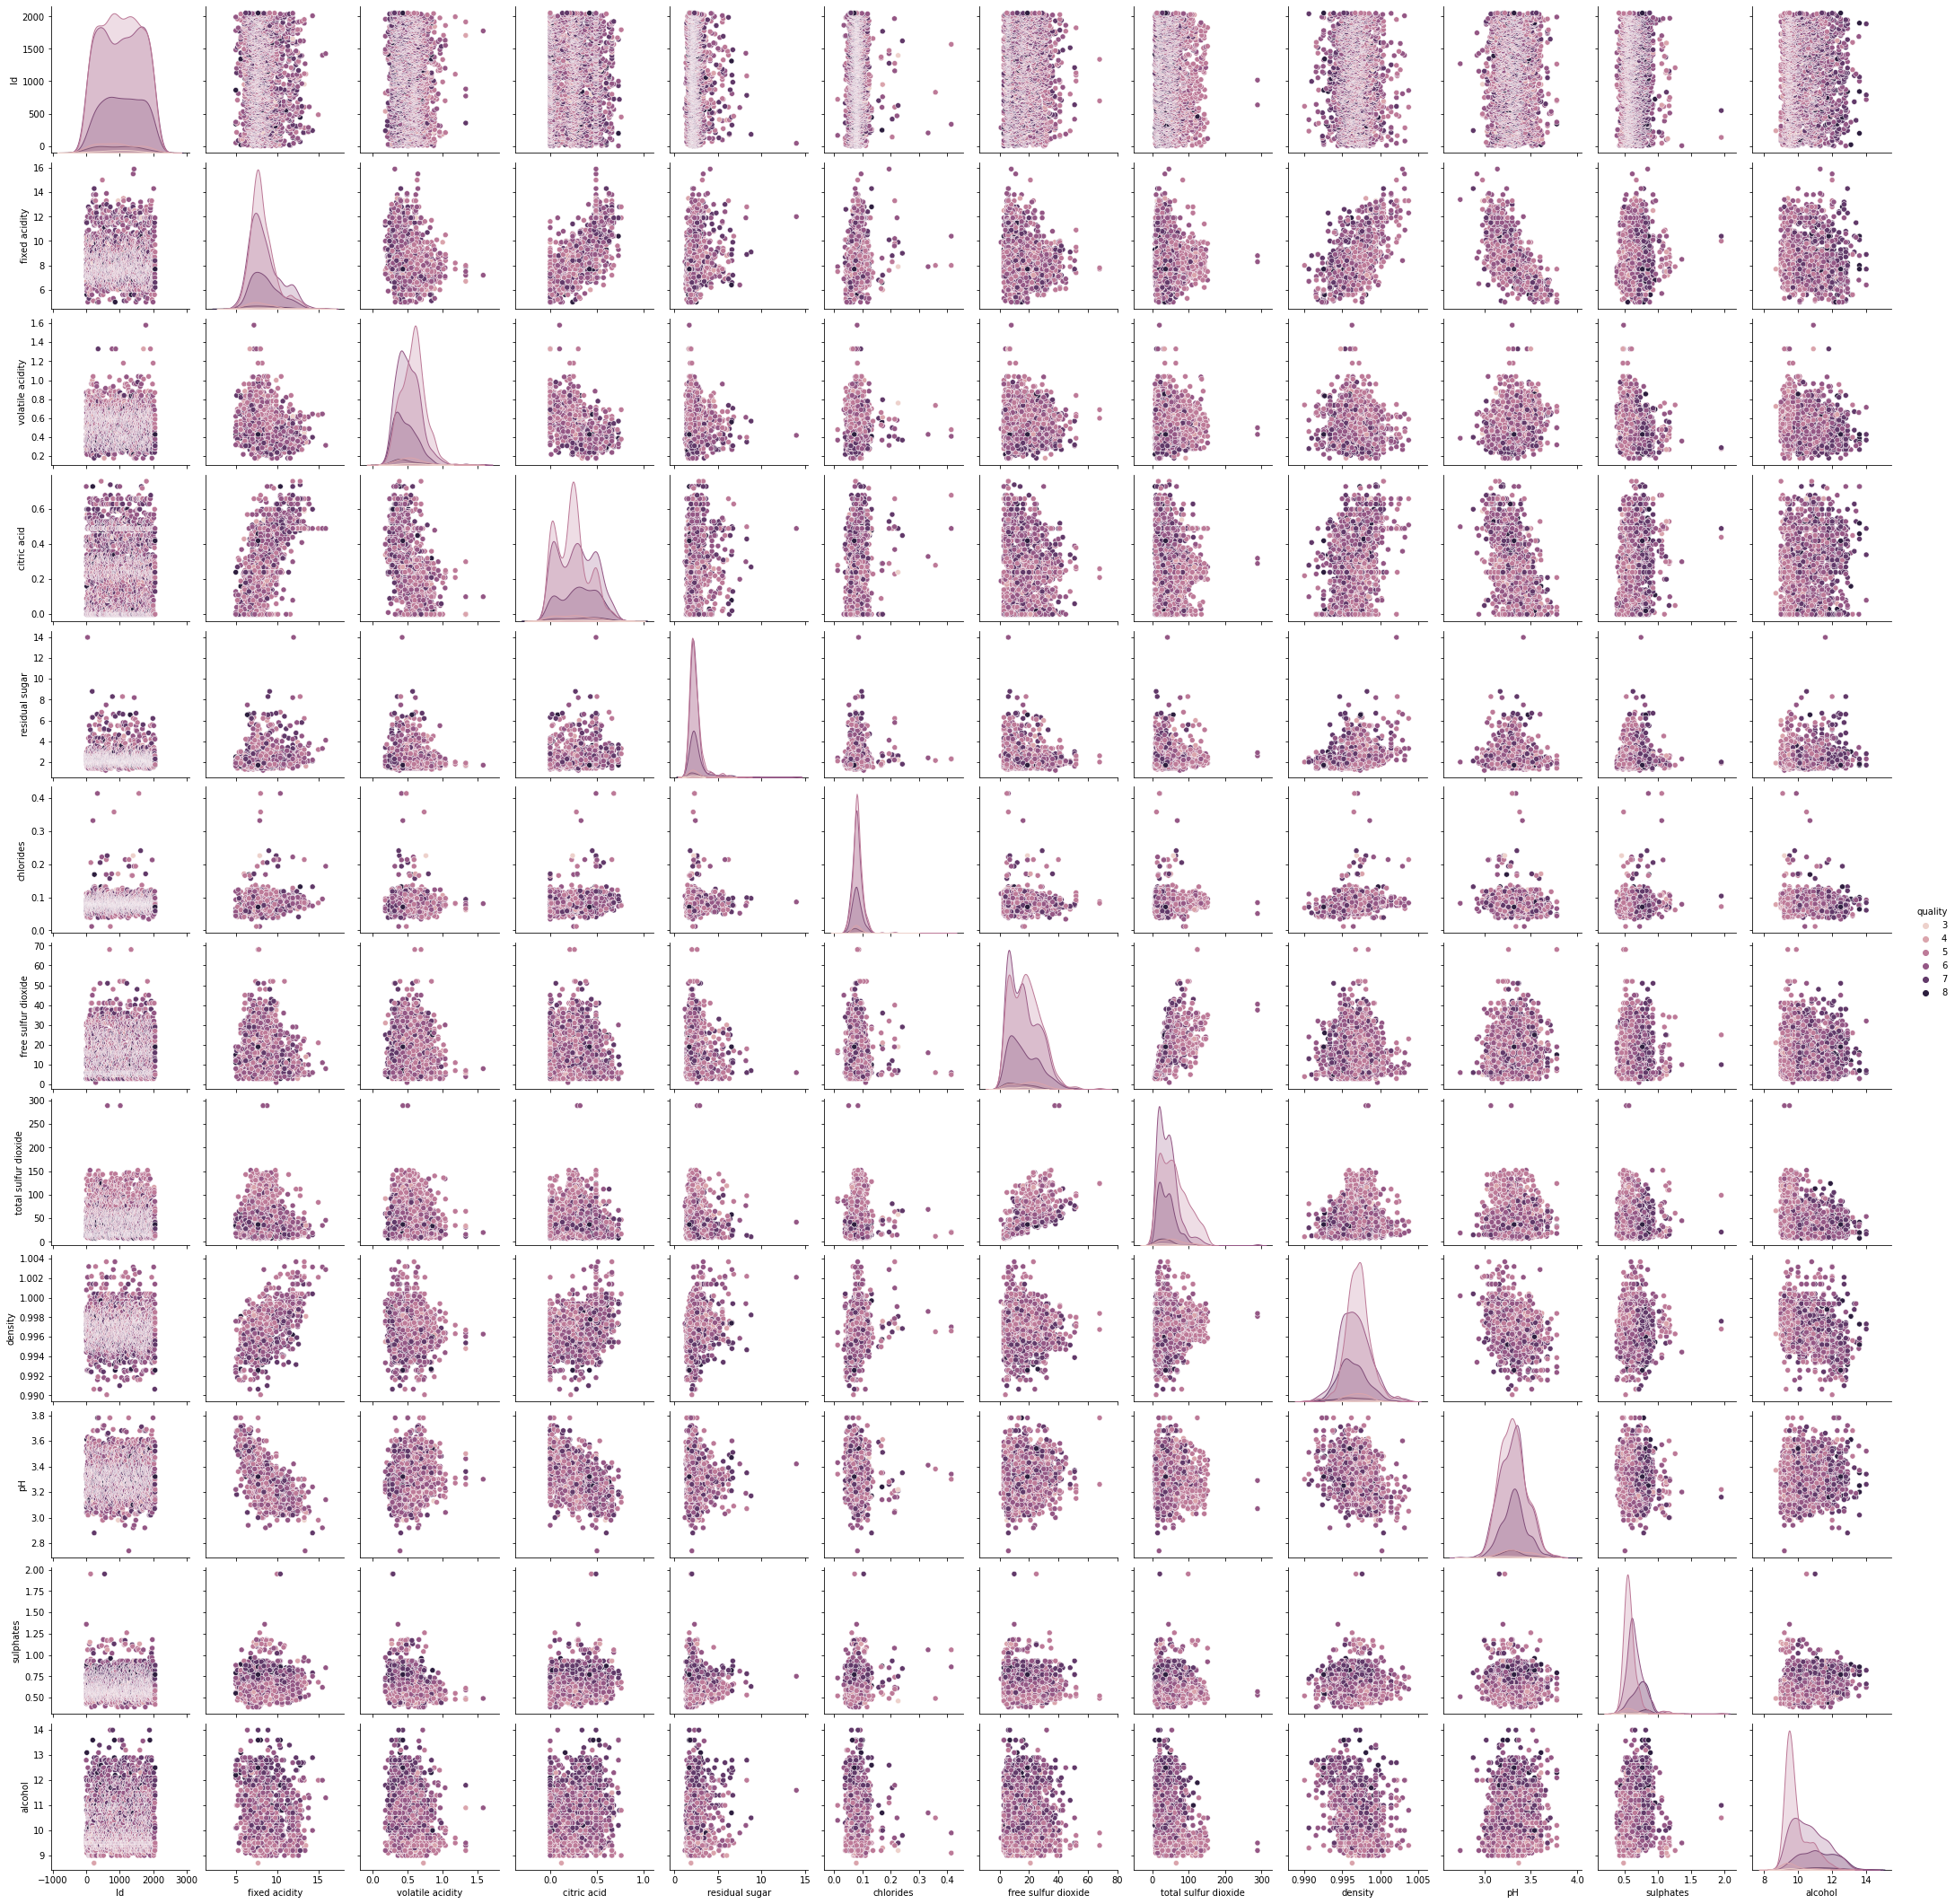

In [16]:
sns.pairplot(train, hue = 'quality')

# PREPROCESSING: 
1. Checking any Outliers and dropping any N/A values 
2. Using robust technique to standardize the data features within a fixed range.


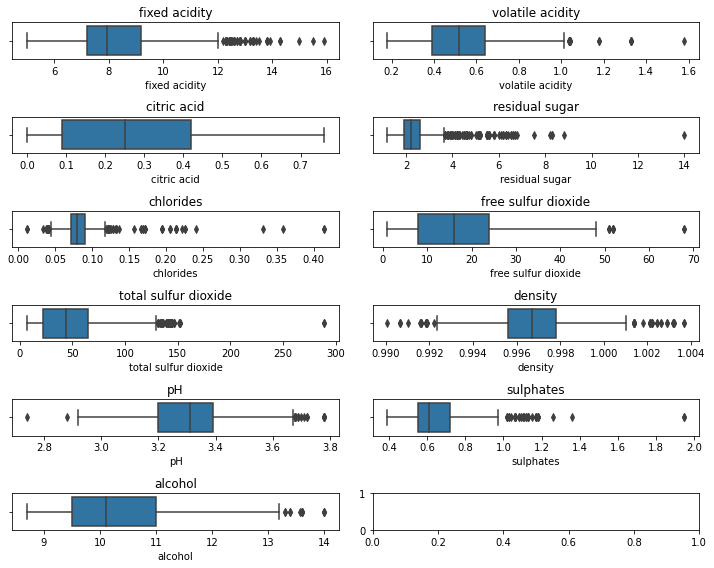

In [4]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
train.dropna()
test.dropna()
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 8))
features = list(features)
# loop over features and plot each boxplot on a separate subplot
for i in range(len(features)):
    sns.boxplot(train[features[i]], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(features[i])  
plt.tight_layout()
plt.show()

Based on the box plots, here are some inferences we can make about the distribution of the features in the dataset:

1. Fixed acidity has a skewed distribution with many outliers on the upper end of the distribution.

2. Volatile acidity has a skewed distribution with a moderate outliers on the upper end of the distribution.

3. Citric acid has a moderately skewed distribution with no outliers.

4. Residual sugar has a very skewed distribution with a large number of outliers on the upper end of the distribution.

5. Chlorides has a moderately skewed distribution with a large numner of outliers on the upper end of the distribution.

6. Free sulfur dioxide has a moderately skewed distribution with a few outliers on the upper end of the distribution.

7. Total sulfur dioxide has a moderately skewed distribution with a large number of outliers on the upper end of the distribution.

8. Density has a moderately skewed distribution with a few outliers on the both sides of the distribution.

9. pH has a symmetric distribution with a few outliers on both sides of the distribution.

10. Sulphates has a skewed distribution with a large number of outliers on the upper end of the distribution.

11. Alcohol has a skewed distribution with a few outliers on the upper end of the distribution.

In [177]:
train = train[(train['fixed acidity'] <= 12) & 
            (train['volatile acidity'] <= 1) &
            (train['residual sugar'] <= 3.8) &
            (0.05 < train['chlorides']) & (train['chlorides'] <= 0.11) &
            (train['free sulfur dioxide'] <= 48) &
            (train['total sulfur dioxide'] <= 125) &
            (0.9935 < train['density']) & (train['density'] <= 1.001) &
            (2.9 < train['pH']) & (train['pH'] <= 3.65) &
            (train['sulphates'] <= 0.9) &
            (train['alcohol'] <= 13)]

# FEATURE ENGINEERING

Let's make the following augmentation:
The total acidity feature that may capture important information about the overall acidity of the wine that is not fully captured by the fixed acidity and volatile acidity features separately. The sweetness feature may capture information about the perceived level of sweetness of the wine, which may be different from the actual residual sugar content due to the influence of other factors such as acidity and bitterness. The total sulfur dioxide feature may capture important information about the stability and shelf-life of the wine, which may be different from the free sulfur dioxide and total sulfur dioxide features separately.

In [5]:
# Add new features to the train data
train['total acidity'] = train['fixed acidity'] + train['volatile acidity']
train['sweetness'] = train['residual sugar'] - train['chlorides']
train['total sulfur dioxide'] = train['free sulfur dioxide'] + train['total sulfur dioxide']

# Train the model on the entire train data set
X_train = train.drop(['quality'], axis=1)
y_train = train['quality']


# Hyperparameter Tuning
Using Grid Search: Grid search is a technique that allows us to systematically search for the best hyperparameters for a machine learning algorithm by testing all possible combinations of hyperparameters in a predefined range. We used GridSearchCV to perform a grid search on the hyperparameter space defined by param_grid. We specified a 5-fold cross-validation using the cv argument to evaluate the performance of each combination of hyperparameters.

In [6]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Set the hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=7)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
# print("Cross-validation accuracy: ", cross_val_score(grid_search, X_train, y_train, cv=5).mean())

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 300}


In [7]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4)
rf.fit(X_train, y_train)

# Add new features to the test data
test['total acidity'] = test['fixed acidity'] + test['volatile acidity']
test['sweetness'] = test['residual sugar'] - test['chlorides']
test['total sulfur dioxide'] = test['free sulfur dioxide'] + test['total sulfur dioxide']

# Make predictions on the test data
X_test = test
y_pred = rf.predict(X_test)

# Print the predicted quality values
print(y_pred)

result_df = pd.DataFrame({'predicted_quality': y_pred})
result_df.to_excel('predicted_labels.xlsx', index=False)

[5 6 6 ... 5 5 5]


In [ ]:
# # load the dataset
# from sklearn.decomposition import PCA
# from sklearn.linear_model import Ridge
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neighbors import KNeighborsClassifier

# y = wine[['quality']]
# X = wine.iloc[:,1:12]
# knn_pipe = Pipeline([('mms', MinMaxScaler()),
#                      ('knn', KNeighborsClassifier())])
# params = [{'knn__n_neighbors': [3, 5, 7, 9],
#          'knn__weights': ['uniform', 'distance'],
#          'knn__leaf_size': [15, 20]}]
# gs_knn = GridSearchCV(knn_pipe,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# gs_knn.fit(X, y)
# # gs_knn.best_params_
# X_test = wine_test.iloc[:,1:12]

# y_pred = gs_knn.predict(X_test)

# # mse = mean_squared_error(y_test, y_pred)
# print('Predicted Quality on Test Set:\n',y_pred)
# y_pred = y_pred.reshape(-1)
# # create a new DataFrame with the predicted labels
# result_df = pd.DataFrame({'predicted_quality': y_pred})
# result_df.to_excel('predicted_labels.xlsx', index=False)
# # print("MSE on test set: {:.3f}".format(mse))
# # print("Best hyperparameters: {}".format(grid_search.best_params_))